# Quiz 01

Mean: 29.962962962962962
Median: 25
Mode: 25
Midrange: 41.5
Q1: 20.5
Q3: 35.0


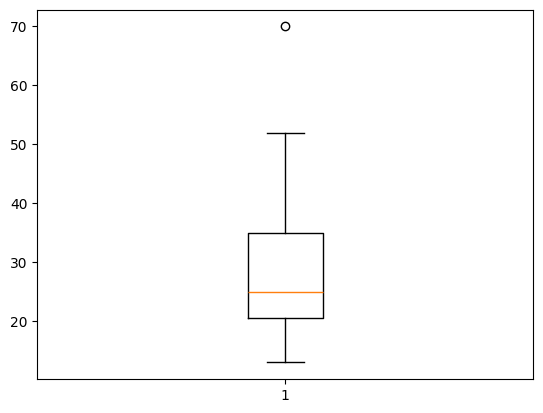

In [2]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Create a list of ages
ages = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]

# Calculate the mean
mean = statistics.mean(ages)
print(f"Mean: {mean}")

# Calculate the median
median = statistics.median(ages)
print(f"Median: {median}")

# Find the mode
mode = statistics.mode(ages)
print(f"Mode: {mode}")

# Calculate the midrange
midrange = (max(ages) + min(ages)) / 2
print(f"Midrange: {midrange}")

# Calculate the first (Q1) and third (Q3) quartiles
Q1 = np.percentile(ages, 25)
Q3 = np.percentile(ages, 75)
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")

# Draw a boxplot of the data
plt.boxplot(ages)
plt.show()

# Quiz 02

52
Mean: 16.653846153846153
Median: 18.0
Mode: 18
Q1: 11.5
Q3: 21.0


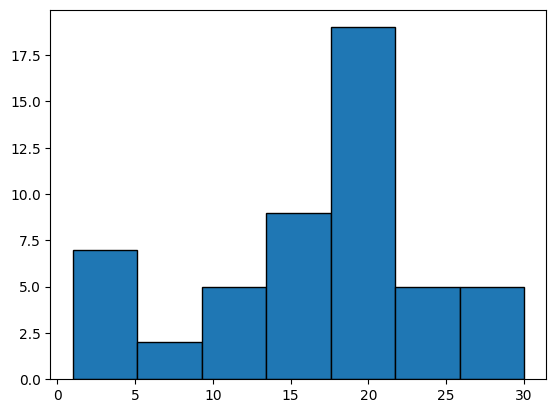

In [6]:

prices = [1, 1, 5, 5, 5, 5, 5, 8, 8, 10, 10, 10, 10, 12, 14, 14, 14, 15, 15, 15, 15, 15, 15, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 25, 25, 25, 25, 25, 28, 28, 30, 30, 30]

# Calculate the mean
print(len(prices))
mean = statistics.mean(prices)
print(f"Mean: {mean}")

# Calculate the median
median = statistics.median(prices)
print(f"Median: {median}")

# Find the mode
mode = statistics.mode(prices)
print(f"Mode: {mode}")

# Calculate the first (Q1) and third (Q3) quartiles
Q1 = np.percentile(prices, 25)
Q3 = np.percentile(prices, 75)
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")

# Draw a histogram of the data
plt.hist(prices, bins=7, edgecolor='black')
plt.show()

# Quiz 3

12.700193878606099
29.962962962962962
Width bins: [array([13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30]), array([33, 33, 35, 35, 35, 35, 36, 40, 45, 46]), array([52])]
Depth bins: [[13, 15, 16, 16, 19, 20, 20, 21, 22], [22, 25, 25, 25, 25, 30, 33, 33, 35], [35, 35, 35, 36, 40, 45, 46, 52, 70]]
Smoothed data: [18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778]
Outliers: [70]


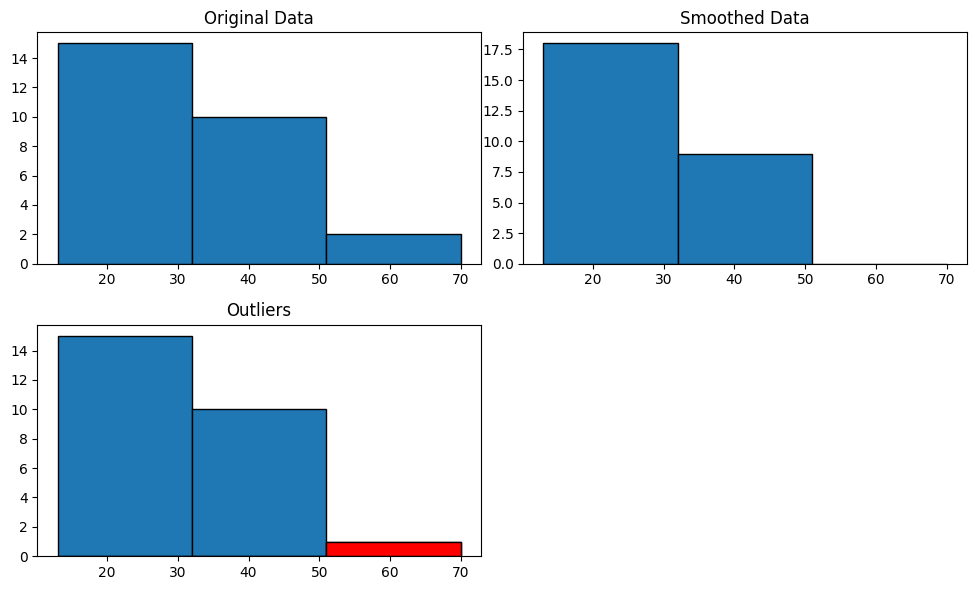

In [11]:
from scipy.spatial import distance

# a. Bin data
data = np.array([13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70])
bins = 3

# Width method
data_range = np.ptp(data)
bin_width = data_range / bins
bins_width = np.arange(min(data), max(data) + bin_width, bin_width)
bins_data = [data[(data >= bins_width[i]) & (data < bins_width[i+1])] for i in range(len(bins_width)-1)]

# Depth method
data_sorted = np.sort(data)
bin_depth = np.array_split(data_sorted, bins)

# b. Smoothing by bin means
bin_depth_means = [np.mean(bin) for bin in bin_depth]
data_smoothed = [bin_depth_means[i] for i in range(bins) for _ in bin_depth[i]]

# c. Detect outliers using Euclidean distance
mean = np.mean(data)
std_dev = np.std(data)
distances = [distance.euclidean([mean], [x]) for x in data]
outliers = [x for x, dist in zip(data, distances) if dist > 2 * std_dev]
print(std_dev)
print(mean)


# Result
# Print results
print("Width bins:", bins_data)
print("Depth bins:", [bin.tolist() for bin in bin_depth])
print("Smoothed data:", data_smoothed)
print("Outliers:", outliers)

# Visualize data
plt.figure(figsize=(10, 6))

# Original data
plt.subplot(2, 2, 1)
plt.hist(data, bins=bins_width, edgecolor='black')
plt.title('Original Data')

# Smoothed data
plt.subplot(2, 2, 2)
plt.hist(data_smoothed, bins=bins_width, edgecolor='black')
plt.title('Smoothed Data')

# Outliers
plt.subplot(2, 2, 3)
plt.hist([x for x in data if x not in outliers], bins=bins_width, edgecolor='black')
plt.hist(outliers, bins=bins_width, edgecolor='black', color='r')
plt.title('Outliers')

plt.tight_layout()
plt.show()